# Importing code from the previous notebooks as module

In [1]:
# instead of copy-pasting the micrograd code everytime
# let's use the below code to pull the code in the form of a module

In [2]:
!git clone https://github.com/mratanusarkar/Learning-DeepLearning.git &> /dev/null
%cd /content/Learning-DeepLearning/Neural\ Networks\ -\ Zero\ to\ Hero
!python setup.py install &> /dev/null

/content/Learning-DeepLearning/Neural Networks - Zero to Hero


In [3]:
from micrograd.engine import Value
from micrograd.visualize import draw_dot

In [4]:
import random
random.seed(2023)

# Neuron Class

In [5]:
# okay, so now that we have tools in our hand to build out complicated mathematical expressions 
# we can now focus on starting to build out neural nets
# neural nets are nothing but a specific class of mathematical expressions

In [6]:
# let's build a multi-layer perceptron
# we have already built a neuron before, 
# but let's build a class this time that matches the design in torch api

In [7]:
# also, I will build my version of the Neuron class with more understandable names and the expression graphs having labels
# and keep what Karpathy had built in his micrograd (and ofcourse those conventions are used in torch api and other ML codebases)
# I will call my version of classes as "Noob", because "I am noob!"

Bringing back the mathematical model of the biological neuron for reference: <br>
[see: [05. expression graph - a neuron.ipynb](https://github.com/mratanusarkar/Learning-DeepLearning/blob/main/Neural%20Networks%20-%20Zero%20to%20Hero/building%20micrograd/05.%20expression%20graph%20-%20a%20neuron.ipynb) for more details]

![neuron_model.jpeg](https://cs231n.github.io/assets/nn1/neuron_model.jpeg)

In [8]:
# Karpathy's micrograd Neuron for Noobs!

class NoobNeuron:

    def __init__(self, n_inputs, label='') -> None:
        """
        Karpathy's micrograd Neuron for Noobs!
        Constructs a neuron that has `n_inputs` number of inputs and assigns random weights & bias to the neuron

        Parameters
        ----------
            n_inputs : int
                number of inputs entering into the neuron
            
            label : str
                (optional) the name or label of the Neuron
        """

        self.label = label
        self.w = [Value(random.uniform(-1,1)) for _ in range(n_inputs)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        """
        Takes in a list of all `n_inputs` number of input `x values`, 
        Computes the body by doing `sum(w.x + b)` and 
        Passes the result through a non-linear activation function to return output

        x = [x1, x2, x3, ..., xn],
        
        and we already have w's and b who's values were randomly assigned.
        w = [w1, w2, w3, ..., wn]
        b = bias

        so, the output would be as follows:
        out = f((x1*w1 + x2*w2 + ... + xn*wn) + b),
        or `out = f(Σ(w.x) + b)`

        where, f() is the activation function (tanh in this case)

        Parameters
        ----------
            x : list(float)
                the input values or the x = [x1, x2, x3, ..., xn]
        """

        sum = Value(0.0, label=f'{self.label} : sum')
        for i, (xi, wi) in enumerate(zip(x, self.w)):
            # inputs
            x = xi if isinstance(xi, Value) else Value(xi)
            x.label=f'{self.label} : x{i}'

            # weights
            w = wi;         w.label=f'{self.label} : w{i}'

            # dendrites of the neuron (inputs weighted)
            den = x * w;    den.label=f'{self.label} : den{i}'

            # sum of dendrite signals inside cell body
            sum = sum + den;

        # bias of the neuron
        b = self.b;     b.label=f'{self.label} : b'

        # bias gets added inside the body
        body = sum + b;     body.label=f'{self.label} : body'

        # the net signal passes through a non-linear activation function
        out = body.tanh()
        out.label=f'{self.label} : out'

        return out

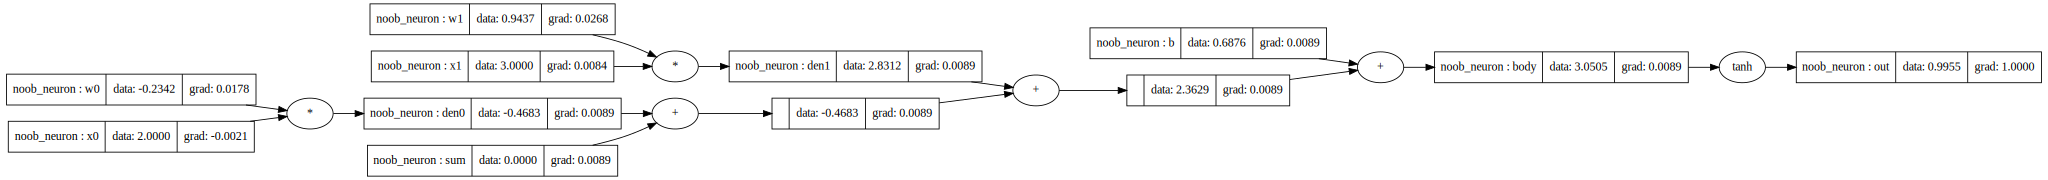

In [9]:
x = [2.0, 3.0]
n = NoobNeuron(2, "noob_neuron")
n = n(x)
n.backward()
draw_dot(n)

In [10]:
# and... here goes much more efficient and optimized implementation

In [11]:
# original micrograd Neuron that is similar to PyTorch API

class Neuron:

    def __init__(self, nin) -> None:
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        # out = f( sum(weights.input_xs + bias) )
        body = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = body.tanh()
        return out

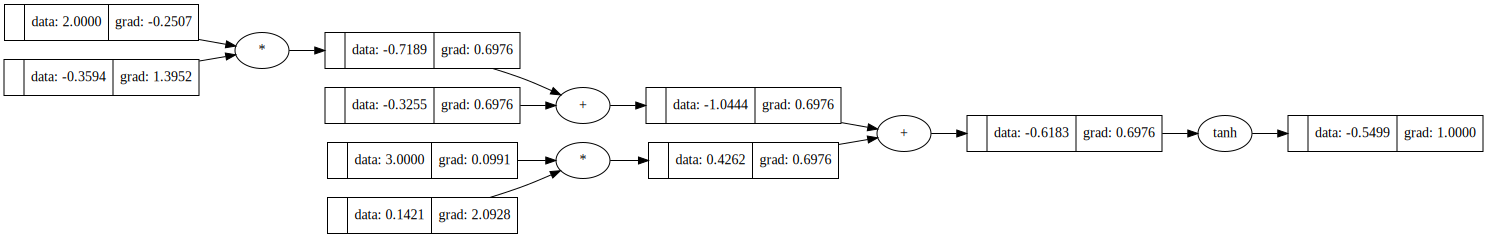

In [12]:
x = [2.0, 3.0]
n = Neuron(2)
n = n(x)
n.backward()
draw_dot(n)